img imshow:


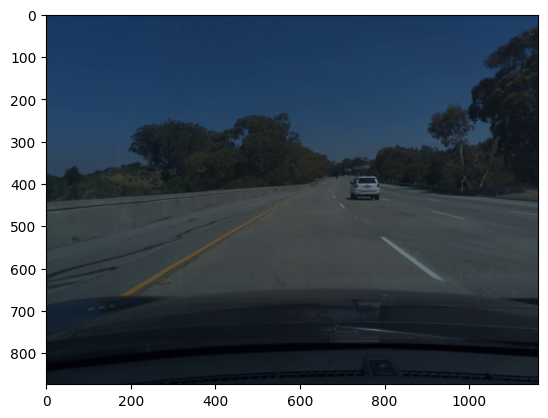

Canny imshow:


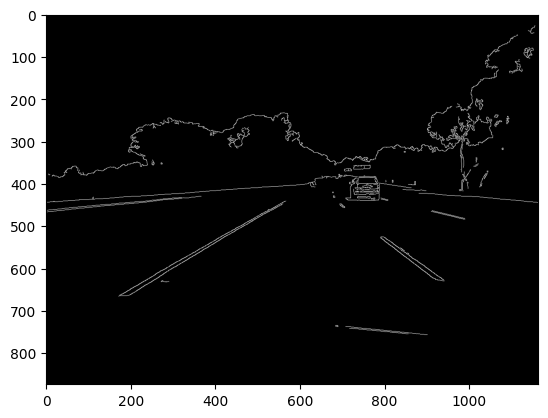

(874, 1164)
calculates:  3914280
30
[(2467, 4.642575810304916), (443, 1.5009831567151235), (668, 1.0297442586766545), (2242, 4.171336912266447), (2249, 4.1887902047863905), (661, 1.0471975511965976), (460, 1.4835298641951802), (2450, 4.625122517784973), (662, 1.0471975511965976), (2248, 4.1887902047863905), (669, 1.0297442586766545), (2241, 4.171336912266447), (2446, 4.60766922526503), (464, 1.4660765716752369), (2244, 4.1887902047863905), (666, 1.0471975511965976), (667, 1.0122909661567112), (2243, 4.153883619746504), (659, 1.064650843716541), (2251, 4.2062434973063345), (2445, 4.60766922526503), (465, 1.4660765716752369), (667, 1.0297442586766545), (2243, 4.171336912266447), (663, 1.064650843716541), (2247, 4.2062434973063345), (2242, 4.153883619746504), (662, 1.064650843716541), (2248, 4.2062434973063345), (668, 1.0122909661567112)]
(874, 1164)
(2910, 360)
counter imshow:


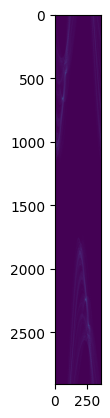

image_with_lines_plt imshow:


image_with_lines imshow:


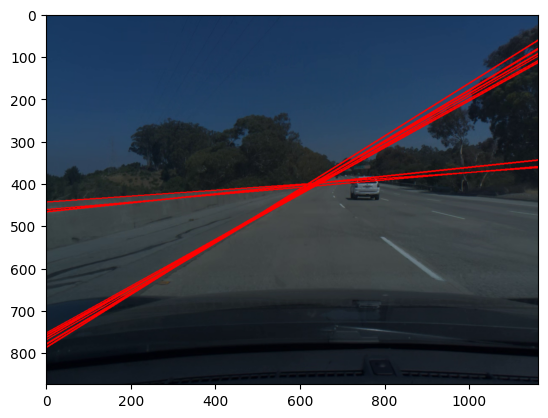

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./test_img/img3.png')
src = img.copy()
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("img imshow:")
plt.imshow(image_rgb)
plt.show()
img = cv2.Canny(img, 50, 150)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Canny imshow:")
plt.imshow(image_rgb)
plt.show()
print(img.shape)

R = int(math.sqrt(img.shape[0]**2 + img.shape[1]**2))
theta_values = np.arange(0, 2*np.pi, np.pi/180)  # 角度
T = theta_values.shape[0]
counter = np.zeros((2*R,T))

edge_pixels = np.argwhere(img > 0)

calculates = 0

for y, x in edge_pixels:
    for theta_index, theta in enumerate(theta_values):
        rho = int(x * np.cos(theta) + y * np.sin(theta))
        counter[rho , theta_index] += 1
        calculates += 1

print("calculates: ",calculates)
threshold = 50

peaks = np.argwhere(counter > threshold)
peak_values = [counter[peak[0], peak[1]] for peak in peaks]
sorted_peaks = np.argsort(peak_values)[::-1]
sorted_peaks = sorted_peaks[:min(len(sorted_peaks), 30)]  # 只取前10个峰值
peaks = [(peaks[i, 0], theta_values[peaks[i, 1]]) for i in sorted_peaks]

print(len(peaks))
print(peaks)
print(img.shape)
print(counter.shape)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("counter imshow:")
plt.imshow(counter)
plt.show()

height, width = img.shape
image_with_lines = np.copy(src).astype(np.uint8)
image_with_lines_plt = np.copy(image_with_lines)
image_with_lines_plt = cv2.cvtColor(image_with_lines_plt, cv2.COLOR_BGR2RGB)

print("image_with_lines_plt imshow:")
plt.imshow(image_with_lines_plt)
for rho, theta in peaks:

    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + R * (-b))
    y1 = int(y0 + R * (a))
    x2 = int(x0 - R * (-b))
    y2 = int(y0 - R * (a))

    plt.plot([x1, x2], [y1, y2], 'r-')
    cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.show()

image_with_lines = cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB)
print("image_with_lines imshow:")
plt.imshow(image_with_lines)
plt.show()
